In [1]:
import spotchaos.syntheticSignals as sp

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.animation import TimedAnimation
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import tqdm
import pickle
import os
from astropy.timeseries import LombScargle
from scipy.integrate import RK45, DOP853
from scipy.stats import chi2, iqr, mode
from scipy.signal import argrelextrema, savgol_filter, medfilt
from scipy.spatial.distance import chebyshev
from scipy.optimize import curve_fit, minimize

import jax
import jax.numpy as jnp
import jaxopt
jax.config.update("jax_enable_x64", True)

import celerite
from celerite import terms
import autograd.numpy as anp

from tinygp import kernels, GaussianProcess

from pytisean import tiseano, tiseanio

In [2]:
matplotlib.rcParams['font.family'] = ['serif']

noiseless range is 37.464956
noisy range is 38.778392000000004
noiseless range is 38.03803
noisy range is 45.843954000000004
noiseless range is 37.465246
noisy range is 47.366678


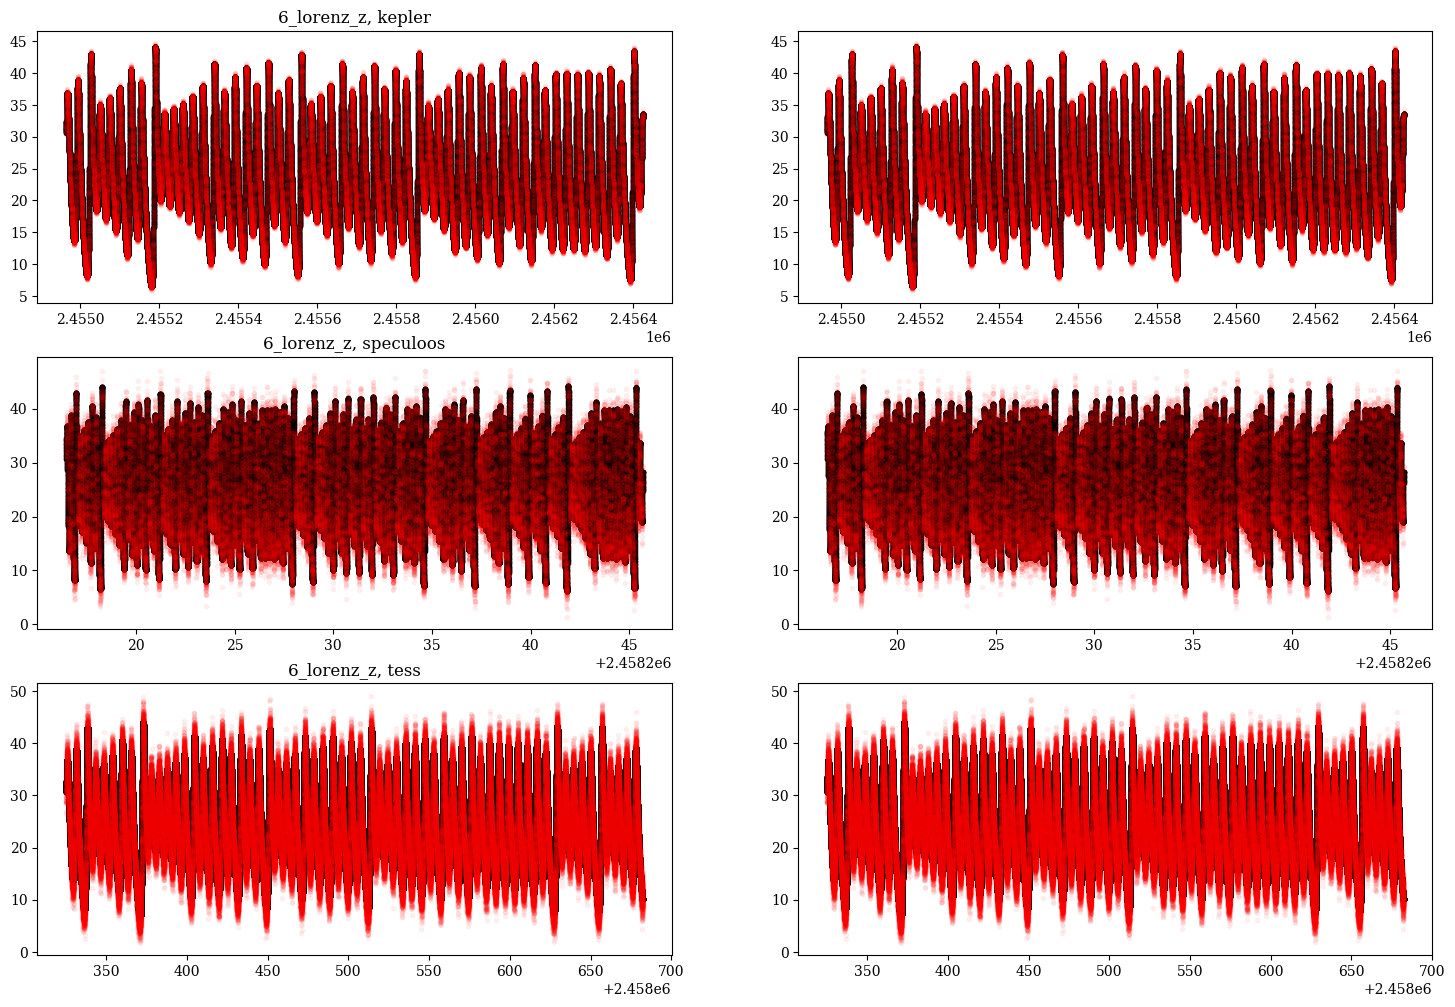

In [20]:
#foldername = "0_gaussian_noise"
#fprefix = "0_gaussianNoise"
#foldername = "1_gaussian_process"
#fprefix = "1_gaussianProcess"
#foldername = "2_simple_periodic"
#fprefix = "2_simplePeriodic"
#foldername = "3_KB88_r"
#fprefix = "3_KB88r"
#foldername = "4_rossler"
#fprefix = "4_rossler_z"
#foldername = "5_transformed_rossler"
#fprefix = "5_transformed_rossler_z"
foldername = "6_lorenz"
fprefix = "6_lorenz_z"


missions = ["kepler","speculoos","tess"]

fig, axes = plt.subplots(3,2,figsize=(18,12))
for i in range(3):
    gapless = np.genfromtxt("./{0}/{1}_{2}_perfect.txt".format(foldername,fprefix,missions[i]))
    gappy = np.genfromtxt("./{0}/{1}_{2}_perfect.txt".format(foldername,fprefix,missions[i]))

    print("noiseless range is {0}".format(np.ptp(gapless[:,1])))
    print("noisy range is {0}".format(np.ptp(gapless[:,2])))
    
    axes[i,0].plot(gapless[:,0], gapless[:,1], 'k.')
    axes[i,0].plot(gapless[:,0], gapless[:,2], 'r.', alpha=0.05)
    axes[i,1].plot(gappy[:,0], gappy[:,1], 'k.')
    axes[i,1].plot(gappy[:,0], gappy[:,2], 'r.', alpha=0.05)

    axes[i,0].set_title("{0}, {1}".format(fprefix, missions[i]))

plt.show()